# Explore here

1. Cargar los datos

In [2]:
import pandas as pd

train_data = pd.read_csv("/workspace/diabetes-forest-ml/data/processed/clean_train.csv")
test_data = pd.read_csv("/workspace/diabetes-forest-ml/data/processed/clean_test.csv")

train_data.head()

/tmp/ipykernel_3116/2436474817.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.0,123.0,88.0,0.0,35.2,0.197,29.0,0
1,1.0,90.0,62.0,59.0,25.1,1.268,25.0,0
2,4.0,115.0,72.0,0.0,28.9,0.376,46.0,1
3,2.0,99.0,52.0,94.0,24.6,0.637,21.0,0
4,3.0,162.0,52.0,0.0,37.2,0.652,24.0,1


In [3]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

2. Inicializacion de Modelo

In [4]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

[Text(0.5429504964953271, 0.9666666666666667, 'Glucose <= 143.5\ngini = 0.448\nsamples = 358\nvalue = [381, 195]\nclass = 0'),
 Text(0.23192903037383178, 0.9, 'Age <= 28.5\ngini = 0.352\nsamples = 275\nvalue = [339, 100]\nclass = 0'),
 Text(0.08995327102803738, 0.8333333333333334, 'Glucose <= 111.5\ngini = 0.177\nsamples = 144\nvalue = [220, 24]\nclass = 0'),
 Text(0.028037383177570093, 0.7666666666666667, 'DiabetesPedigreeFunction <= 0.501\ngini = 0.1\nsamples = 92\nvalue = [144, 8]\nclass = 0'),
 Text(0.018691588785046728, 0.7, 'gini = 0.0\nsamples = 68\nvalue = [112, 0]\nclass = 0'),
 Text(0.037383177570093455, 0.7, 'BMI <= 33.45\ngini = 0.32\nsamples = 24\nvalue = [32, 8]\nclass = 0'),
 Text(0.018691588785046728, 0.6333333333333333, 'Pregnancies <= 1.5\ngini = 0.071\nsamples = 16\nvalue = [26, 1]\nclass = 0'),
 Text(0.009345794392523364, 0.5666666666666667, 'gini = 0.0\nsamples = 8\nvalue = [17, 0]\nclass = 0'),
 Text(0.028037383177570093, 0.5666666666666667, 'BMI <= 32.25\ngini = 

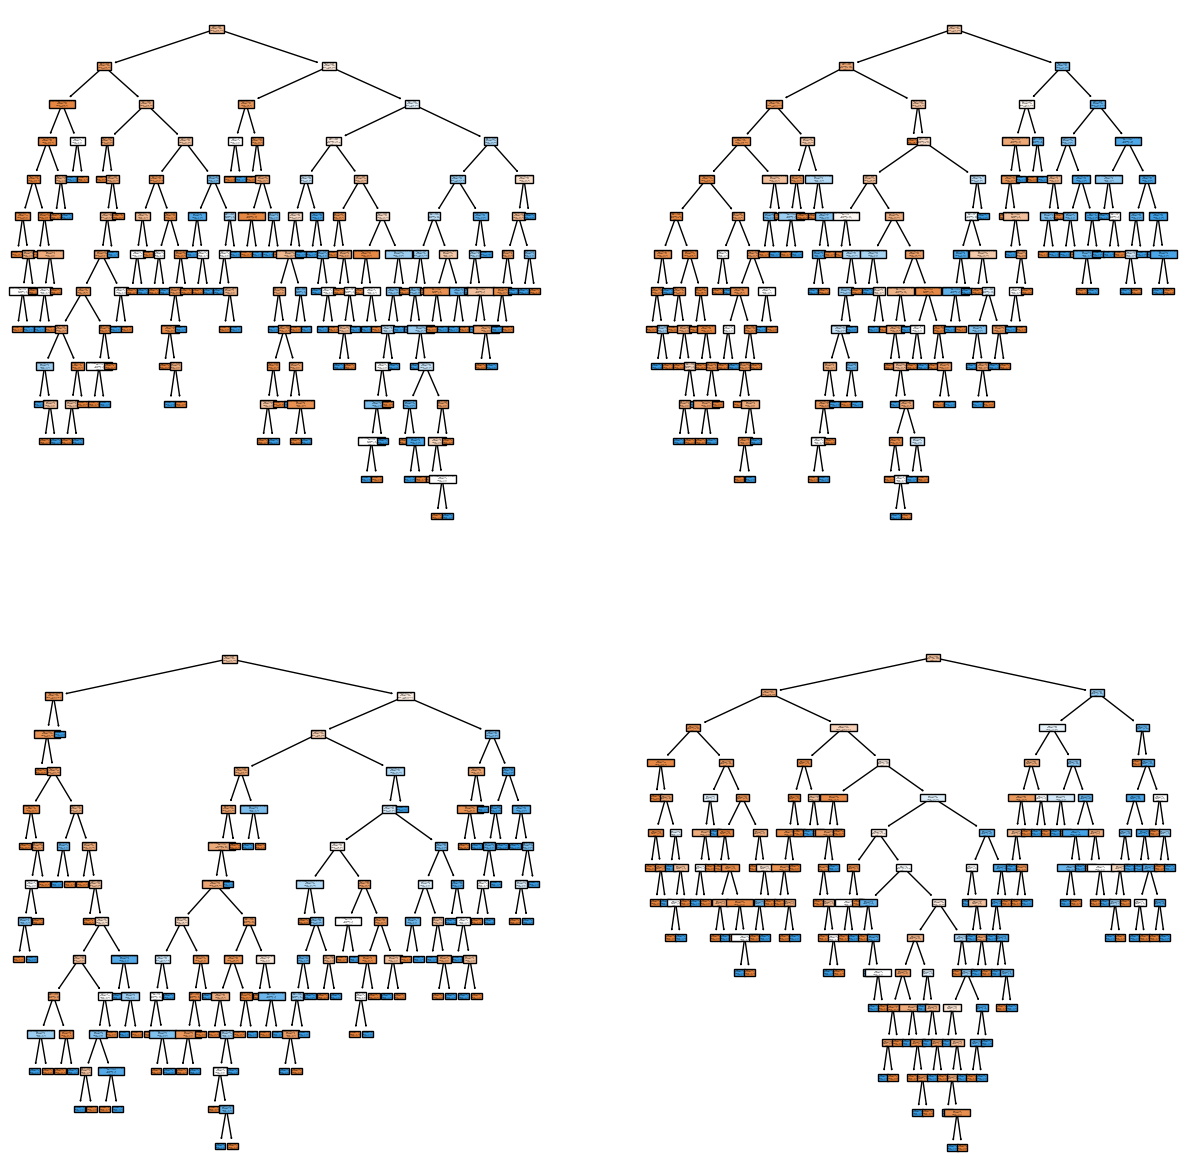

In [5]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

3. Prediccion de modelo

In [6]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7655172413793103

4. Optimizacion de modelo

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

hyperparam = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=model, param_grid=hyperparam, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion= 'entropy', max_depth = 20, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 10, n_estimators = 10, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=10, random_state=42)

In [47]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [48]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7655172413793103

In [49]:
from pickle import dump

dump(model, open("/workspace/diabetes-forest-ml/models/randforest_classifier_ne_10_ent_md20_42.sav", "wb"))